In [2]:
import collections
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

print ("Packages loaded.")

Packages loaded.


In [3]:
# Configuration
batch_size     = 20
embedding_size = 2     # This is just for visualization
num_sampled    = 15    # Number of negative examples to sample.

In [4]:

# Sample sentences
sentences = ["the quick brown fox jumped over the lazy dog",
            "I love cats and dogs",
            "we all love cats and dogs",
            "cats and dogs are great",
            "sung likes cats",
            "she loves dogs",
            "cats can be very independent",
            "cats are great companions when they want to be",
            "cats are playful",
            "cats are natural hunters",
            "It's raining cats and dogs",
            "dogs and cats love sung"]
# 'sentences' is 'list' 
print ("'sentences' is %s and length is %d." 
       % (type(sentences), len(sentences)))

'sentences' is <type 'list'> and length is 12.


In [5]:
words = " ".join(sentences).split() 
print ("'words' is %s and length is %d." % (type(words), len(words)))
print (words)

'words' is <type 'list'> and length is 62.
['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', 'I', 'love', 'cats', 'and', 'dogs', 'we', 'all', 'love', 'cats', 'and', 'dogs', 'cats', 'and', 'dogs', 'are', 'great', 'sung', 'likes', 'cats', 'she', 'loves', 'dogs', 'cats', 'can', 'be', 'very', 'independent', 'cats', 'are', 'great', 'companions', 'when', 'they', 'want', 'to', 'be', 'cats', 'are', 'playful', 'cats', 'are', 'natural', 'hunters', "It's", 'raining', 'cats', 'and', 'dogs', 'dogs', 'and', 'cats', 'love', 'sung']


In [7]:
len(words)

62

In [11]:
count = collections.Counter(words).most_common()

print ("'count' is %s and length is %d." % (type(count), len(count)))
print (("Word count of top five is %s") % (count[:5]))
print (count)

'count' is <type 'list'> and length is 35.
Word count of top five is [('cats', 10), ('dogs', 6), ('and', 5), ('are', 4), ('love', 3)]
[('cats', 10), ('dogs', 6), ('and', 5), ('are', 4), ('love', 3), ('be', 2), ('sung', 2), ('great', 2), ('the', 2), ('raining', 1), ('all', 1), ('when', 1), ('over', 1), ('we', 1), ('playful', 1), ('want', 1), ('to', 1), ('jumped', 1), ('hunters', 1), ('companions', 1), ('fox', 1), ('very', 1), ("It's", 1), ('can', 1), ('brown', 1), ('lazy', 1), ('I', 1), ('independent', 1), ('they', 1), ('natural', 1), ('dog', 1), ('she', 1), ('loves', 1), ('quick', 1), ('likes', 1)]


In [13]:
print (words[0:5])
print (count[0:3])

['the', 'quick', 'brown', 'fox', 'jumped']
[('cats', 10), ('dogs', 6), ('and', 5)]


In [21]:
rdic = [i[0] for i in count]
dic = {w: i for i, w in enumerate(rdic)}
voc_size = len(dic)

print ("'rdic' is %s and length is %d." % (type(rdic), len(rdic)))
print ("'dic' is %s and length is %d." % (type(dic), len(dic)))

'rdic' is <type 'list'> and length is 35.
'dic' is <type 'dict'> and length is 35.


In [23]:
print (rdic)

['cats', 'dogs', 'and', 'are', 'love', 'be', 'sung', 'great', 'the', 'raining', 'all', 'when', 'over', 'we', 'playful', 'want', 'to', 'jumped', 'hunters', 'companions', 'fox', 'very', "It's", 'can', 'brown', 'lazy', 'I', 'independent', 'they', 'natural', 'dog', 'she', 'loves', 'quick', 'likes']


In [25]:
print (dic)

{'and': 2, 'raining': 9, 'all': 10, 'love': 4, 'brown': 24, 'when': 11, 'over': 12, 'lazy': 25, 'playful': 14, 'are': 3, 'want': 15, 'sung': 6, 'jumped': 17, 'hunters': 18, 'companions': 19, 'fox': 20, 'to': 16, 'cats': 0, "It's": 22, 'dogs': 1, 'she': 31, 'be': 5, 'we': 13, 'very': 21, 'independent': 27, 'they': 28, 'natural': 29, 'great': 7, 'I': 26, 'dog': 30, 'can': 23, 'loves': 32, 'quick': 33, 'the': 8, 'likes': 34}


In [27]:
print (rdic[0])
print (dic['cats'])

cats
0


In [31]:
data = [dic[word] for word in words]

print ("'data' is %s and length is %d." % (type(data), len(data)))
print('Sample data: numbers: %s / words: %s'% (data[:10], [rdic[t] for t in data[:10]]))

'data' is <type 'list'> and length is 62.
Sample data: numbers: [8, 33, 24, 20, 17, 12, 8, 25, 30, 26] / words: ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', 'I']


In [33]:
# See what's in the data
print (data)

[8, 33, 24, 20, 17, 12, 8, 25, 30, 26, 4, 0, 2, 1, 13, 10, 4, 0, 2, 1, 0, 2, 1, 3, 7, 6, 34, 0, 31, 32, 1, 0, 23, 5, 21, 27, 0, 3, 7, 19, 11, 28, 15, 16, 5, 0, 3, 14, 0, 3, 29, 18, 22, 9, 0, 2, 1, 1, 2, 0, 4, 6]


In [35]:
# ([the, brown], quick), ([quick, fox], brown), ([brown, jumped], fox),
cbow_pairs = [];
for i in range(1, len(data)-1) :
    cbow_pairs.append([[data[i-1], data[i+1]], data[i]]);
print('Context pairs: %s' % (cbow_pairs[:10]))

Context pairs: [[[8, 24], 33], [[33, 20], 24], [[24, 17], 20], [[20, 12], 17], [[17, 8], 12], [[12, 25], 8], [[8, 30], 25], [[25, 26], 30], [[30, 4], 26], [[26, 0], 4]]


In [37]:
print ("'cbow_pairs' is %s and length is %d." 
       % (type(cbow_pairs), len(cbow_pairs)))

'cbow_pairs' is <type 'list'> and length is 60.


In [39]:
# (quick, the), (quick, brown), (brown, quick), (brown, fox), ...
skip_gram_pairs = [];
for c in cbow_pairs:
    skip_gram_pairs.append([c[1], c[0][0]])
    skip_gram_pairs.append([c[1], c[0][1]])
    
print ("'skip_gram_pairs' is %s and length is %d."
       % (type(skip_gram_pairs), len(skip_gram_pairs)))
print('skip-gram pairs', skip_gram_pairs[:5])

'skip_gram_pairs' is <type 'list'> and length is 120.
('skip-gram pairs', [[33, 8], [33, 24], [24, 33], [24, 20], [20, 24]])


In [42]:
def generate_batch(size):
    assert size < len(skip_gram_pairs)
    x_data=[]
    y_data = []
    r = np.random.choice(range(len(skip_gram_pairs)), size, replace=False)
    for i in r:
        x_data.append(skip_gram_pairs[i][0])  # n dim
        y_data.append([skip_gram_pairs[i][1]])  # n, 1 dim
    return x_data, y_data

# generate_batch test
print ('Batches (x, y)', generate_batch(3))

('Batches (x, y)', ([31, 2, 28], [[32], [0], [15]]))


In [44]:
# Input data
train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
# need to shape [batch_size, 1] for nn.nce_loss
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

   # Look up embeddings for inputs.
embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
embed = tf.nn.embedding_lookup(embeddings, train_inputs) # lookup table

# Construct the variables for the NCE loss
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

# Compute the average NCE loss for the batch.
loss = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, embed, train_labels,num_sampled, voc_size))

# Use the adam optimizer
train_op = tf.train.AdamOptimizer(0.01).minimize(loss)
print ("Network ready")

Network ready


In [47]:
# Launch the graph in a session
with tf.Session() as sess:
    # Initializing all variables
    tf.initialize_all_variables().run()

    for step in range(10000):
        batch_inputs, batch_labels = generate_batch(batch_size)
        _, loss_val = sess.run([train_op, loss],
                feed_dict={train_inputs: batch_inputs, train_labels: batch_labels})
        if step % 1000 == 0:
            print("Loss at %d: %.5f" % (step, loss_val)) 
            # Report the loss

    # Final embeddings are ready for you to use. 
    # Need to normalize for practical use
    trained_embeddings = embeddings.eval()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Loss at 0: 17.91232
Loss at 1000: 2.77741
Loss at 2000: 3.04302
Loss at 3000: 2.99809
Loss at 4000: 2.97868
Loss at 5000: 2.83887
Loss at 6000: 2.77126
Loss at 7000: 2.72032
Loss at 8000: 2.64105
Loss at 9000: 2.71831


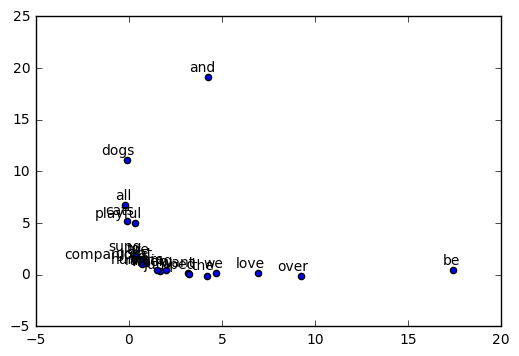

In [49]:
# Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = rdic[:20] # Show top 20 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
    plt.show()